In [17]:
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [18]:
pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#  Machine Learning Models Built

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the Cleaned Datase

In [20]:
# Load dataset
df = pd.read_csv("clean_stock_data.csv")

# Convert date column to datetime if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

sns.set(style="whitegrid")
# Display dataset info
print(df.head())
print(df.info())


        date symbol    open    high     low   close    volume  change  \
0 2021-01-08   META  268.31  268.95  263.18  267.57  18528300   -0.74   
1 2021-01-11   META  260.48  263.47  255.90  256.84  30412300   -3.64   
2 2021-01-12   META  256.63  259.72  250.30  251.09  26449943   -5.54   
3 2021-01-13   META  251.55  253.95  249.20  251.64  19528938    0.09   
4 2021-01-14   META  253.40  255.03  244.61  245.64  29739404   -7.76   

   changePercent      vwap  changeOverTime       label  unadjustedVolume  \
0      -0.275800  267.0025        0.000000  2021-01-08          18528300   
1      -1.400000  259.1725       -0.040102  2021-01-11          30412300   
2      -2.160000  254.4350       -0.061591  2021-01-12          26449943   
3       0.035778  251.5850       -0.059536  2021-01-13          19528938   
4      -3.060000  249.6700       -0.081960  2021-01-14          29739404   

   adjClose  
0    267.57  
1    256.84  
2    251.09  
3    251.64  
4    245.64  
<class 'pandas.core.

#### Feature Selection and Target Variable

In [21]:
# Select input features
features = [
    "open",
    "high",
    "low",
    "volume",
    "vwap",
    "change",
    "changePercent"
]

# Target variable
target = "close"

X = df[features]
y = df[target]


### Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# visualization 

## Time Series Plot – Closing Price Over Time

Best for: Explaining the problem context and real-world relevance

Visualization

`Line plot of date vs close`

Why it’s important

Shows how stock prices fluctuate daily

Demonstrates that the problem is time-dependent

Helps justify why prediction is challenging but valuable

How to explain it

This visualization shows the historical movement of the stock’s closing price over time, highlighting trends, volatility, and market behavior that the model aims to learn and predict.

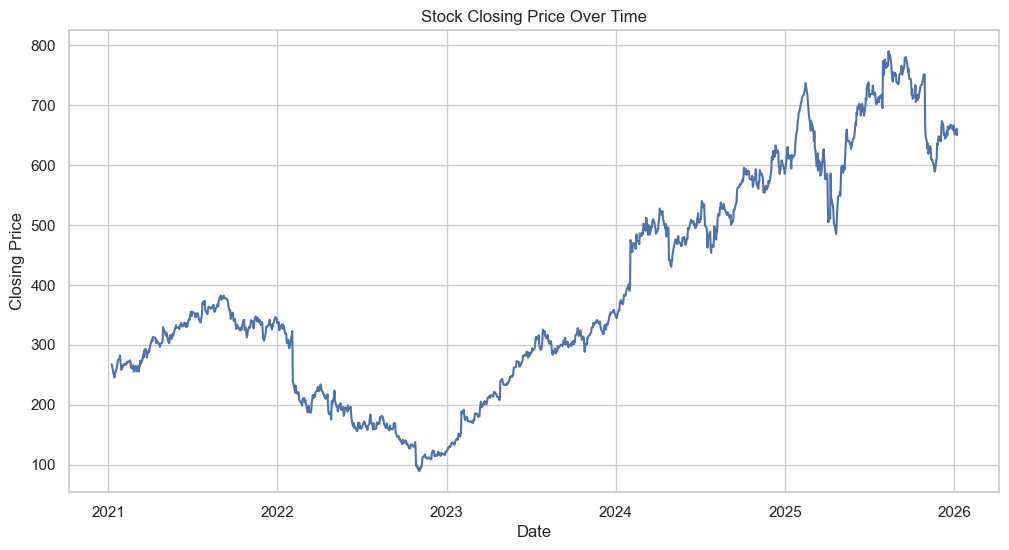

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Over Time")
plt.show()


## Feature vs Target Scatter Plots

Best for: Showing why selected features matter

Create scatter plots of:

`open vs close`

`high vs close`

`low vs close`

`vwap vs close`

`volume vs close`

Why it’s important:

Shows linear or non-linear relationships

Justifies feature selection

Supports the use of regression models

How to explain it:

These plots illustrate how key trading indicators relate to the closing price, revealing strong correlations that make them suitable predictors in a regression model.

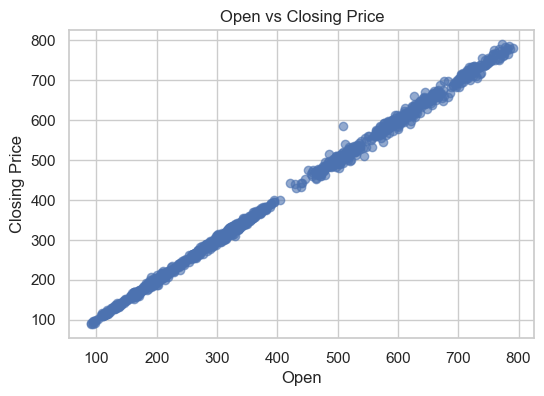

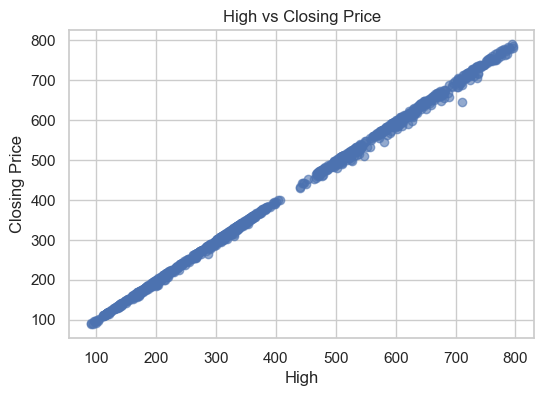

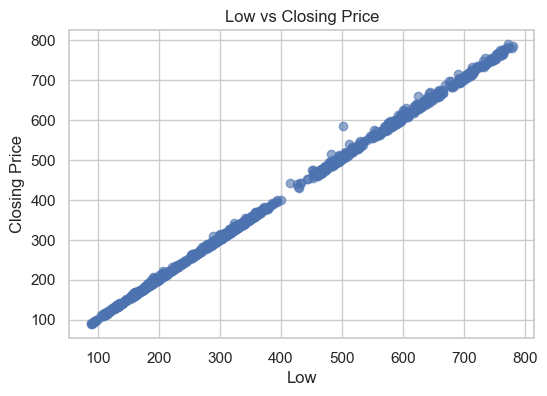

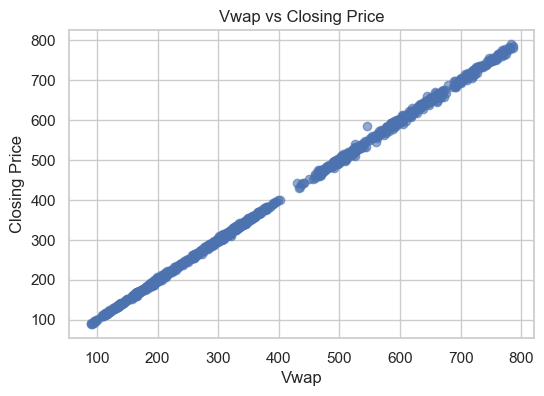

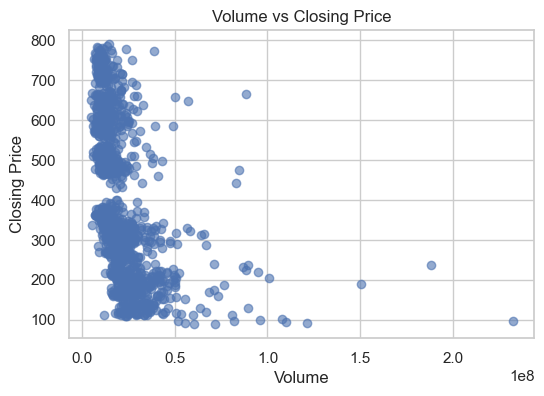

In [24]:
features = ['open', 'high', 'low', 'vwap', 'volume']

for feature in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[feature], df['close'], alpha=0.6)
    plt.xlabel(feature.capitalize())
    plt.ylabel("Closing Price")
    plt.title(f"{feature.capitalize()} vs Closing Price")
    plt.show()


## Correlation Heatmap (Feature Importance Insight)

Best for: Feature understanding and model justification

Visualization:

Heatmap of correlations between all numerical features including close

Why it’s important:

Identifies strongest predictors of closing price

Detects multicollinearity

Explains model performance expectations

How to explain it:

The correlation matrix highlights strong positive relationships between the closing price and features such as open, high, low, and VWAP, validating their inclusion in the model.

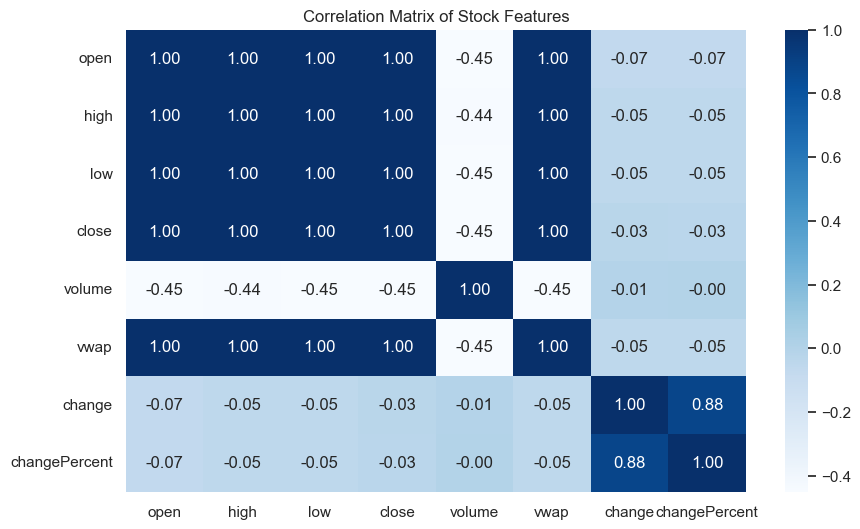

In [25]:

plt.figure(figsize=(10,6))

corr = df[['open', 'high', 'low', 'close', 'volume', 'vwap', 'change', 'changePercent']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",   # Blue–White color scale
    fmt=".2f"
)

plt.title("Correlation Matrix of Stock Features")
plt.show()


## Distribution of the Target Variable (Close)

Best for: Understanding target variable behavior

Visualization:

Histogram or KDE plot of close

Why it’s important:

Shows price range and variability

Identifies skewness or outliers

Important for regression assumptions

How to explain it:

This distribution shows how closing prices are spread across trading days, helping assess variability and potential outliers in the target variable.

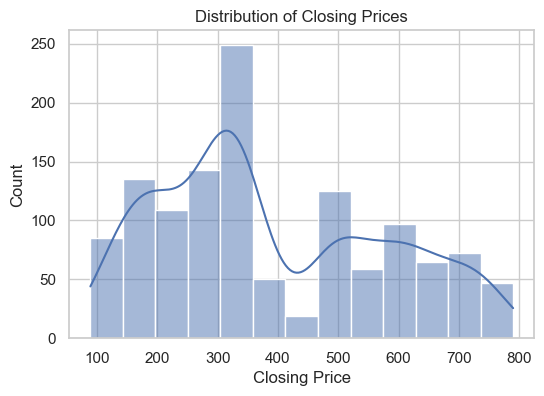

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['close'], kde=True)
plt.xlabel("Closing Price")
plt.title("Distribution of Closing Prices")
plt.show()


#### Model 1: Linear Regression

In [27]:
# Initialize model
linear_model = LinearRegression()

# Train model
linear_model.fit(X_train, y_train)

# Predictions
lr_predictions = linear_model.predict(X_test)
lr_predictions

array([708.64924364, 330.34961739, 282.13965019, 311.53972734,
       531.47967777, 510.91937204, 341.00954995, 120.43976101,
       511.82925779, 523.15949962, 576.46940178, 649.49949076,
       704.27921881, 129.819186  , 215.69978234, 521.11957313,
       214.00473713, 228.06945871, 235.78970454, 715.66869567,
       554.3994985 , 169.34967462, 705.29964764, 286.97967531,
       596.24893335, 168.79974986, 694.84938436, 153.11961634,
       301.63972698, 268.39966608, 132.80957378, 499.48956975,
       316.00956529, 153.12935141, 294.29968059, 174.94927239,
       339.99463226, 471.84932942, 377.99971403, 330.55951623,
       652.70907931, 290.52960446, 364.72956134, 350.48970585,
       341.88963489, 694.13951329, 113.01967883, 270.38974318,
       338.68963028, 308.6496232 , 305.06964762, 318.28965644,
       237.02953177, 169.5397423 , 754.78870886, 630.78946574,
       619.5593885 , 299.6696578 , 497.36922412, 168.52979362,
       170.38982309, 218.85977048, 198.85964749, 320.01

#### Model 2: Random Forest Regressor

In [28]:
# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([704.3816  , 330.4844  , 286.9807  , 310.82935 , 547.9965  ,
       517.7041  , 345.83665 , 120.08665 , 507.49455 , 522.44145 ,
       575.5529  , 654.560525, 699.6206  , 132.41485 , 215.37295 ,
       521.11385 , 214.14555 , 231.50985 , 233.34505 , 702.55665 ,
       556.4232  , 168.3431  , 713.99895 , 286.70255 , 592.0171  ,
       166.7582  , 694.871   , 149.83975 , 302.9365  , 267.1008  ,
       134.31865 , 500.4582  , 315.1844  , 157.0725  , 296.6595  ,
       174.51055 , 340.1387  , 467.8777  , 377.1421  , 330.60335 ,
       648.41895 , 291.6684  , 368.2272  , 352.7663  , 340.3461  ,
       698.3703  , 111.32825 , 271.481   , 339.1827  , 309.77685 ,
       304.52615 , 318.2294  , 238.0341  , 171.92645 , 745.5981  ,
       632.712   , 621.81425 , 301.4596  , 494.1289  , 168.38135 ,
       169.47765 , 221.1374  , 192.8495  , 319.95865 , 307.49775 ,
       170.26715 , 530.03335 , 325.05365 , 766.4204  , 293.3095  ,
       608.72355 , 328.02375 , 258.5078  , 203.99465 , 724.893

##### Model 3: Support Vector Regressor (SVR)

In [29]:
# Initialize model
svr_model = SVR()

# Train model
svr_model.fit(X_train, y_train)

# Predictions
svr_predictions = svr_model.predict(X_test)
svr_predictions

array([395.0508651 , 374.4495689 , 342.38801893, 386.4772616 ,
       369.82394113, 295.46476098, 292.14256051, 260.56055692,
       386.93058682, 388.77419377, 363.34237576, 361.3392867 ,
       377.15263788, 316.54791899, 359.55216859, 392.09672979,
       340.51186653, 267.69770246, 331.17032991, 323.59897342,
       368.60771317, 278.8196528 , 352.97271994, 335.93955815,
       303.46751083, 272.37240607, 378.1525707 , 281.38495006,
       370.29770058, 330.21607917, 301.05857189, 375.67371642,
       322.92036638, 259.98805461, 343.19060231, 307.6951892 ,
       341.685904  , 388.29354843, 394.02384502, 334.40269953,
       375.69336521, 300.27703846, 296.40563162, 369.32952178,
       356.79942625, 392.10281395, 290.5711736 , 376.89717892,
       349.83373572, 319.52304308, 359.35118369, 353.14495473,
       264.50078962, 338.58447582, 387.6965102 , 399.74814096,
       360.45570315, 337.93580911, 385.5582827 , 342.51381909,
       335.3291549 , 362.03061346, 271.59598913, 340.25

In [30]:
models = {
    "Linear Regression": lr_predictions,
    "Random Forest": rf_predictions,
    "SVR": svr_predictions
}

for model_name, preds in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)


Linear Regression
RMSE: 0.0027
R2 Score: 1.0000
------------------------------
Random Forest
RMSE: 3.2808
R2 Score: 0.9997
------------------------------
SVR
RMSE: 161.1129
R2 Score: 0.2186
------------------------------


In [31]:
models = {
    "Linear Regression": lr_predictions,
    "Random Forest": rf_predictions,
    "SVR": svr_predictions
}

for model_name, preds in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)

Linear Regression
RMSE: 0.0027
R2 Score: 1.0000
------------------------------
Random Forest
RMSE: 3.2808
R2 Score: 0.9997
------------------------------
SVR
RMSE: 161.1129
R2 Score: 0.2186
------------------------------


##### Model Evaluation

In [32]:
models = {
    "Linear Regression": lr_predictions,
    "Random Forest": rf_predictions,
    "SVR": svr_predictions
}

for model_name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)



Linear Regression
RMSE: 0.0027
R2 Score: 1.0000
------------------------------
Random Forest
RMSE: 3.2808
R2 Score: 0.9997
------------------------------
SVR
RMSE: 161.1129
R2 Score: 0.2186
------------------------------


## Model Evaluation and Best Model Selection

We evaluate the three regression models using standard regression metrics:

RMSE (Root Mean Squared Error) → lower is better

R² Score → closer to 1 is better

#### Evaluation Code

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Create evaluation table
evaluation_results = []

# Linear Regression evaluation
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

evaluation_results.append({
    "Model": "Linear Regression",
    "RMSE": lr_rmse,
    "R2 Score": lr_r2
})

# Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

evaluation_results.append({
    "Model": "Random Forest Regressor",
    "RMSE": rf_rmse,
    "R2 Score": rf_r2
})

# SVR evaluation
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_predictions)

evaluation_results.append({
    "Model": "Support Vector Regressor",
    "RMSE": svr_rmse,
    "R2 Score": svr_r2
})

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

print(evaluation_df)


                      Model        RMSE  R2 Score
0         Linear Regression    0.002746  1.000000
1   Random Forest Regressor    3.280801  0.999676
2  Support Vector Regressor  161.112897  0.218583


## Model Comparison Chart

Visualization comparing the performance metrics (RMSE, R² Score) across the three models (Linear Regression, Random Forest, SVR). The evaluation metrics are printed as text but not visualized with a bar chart or comparison plot.

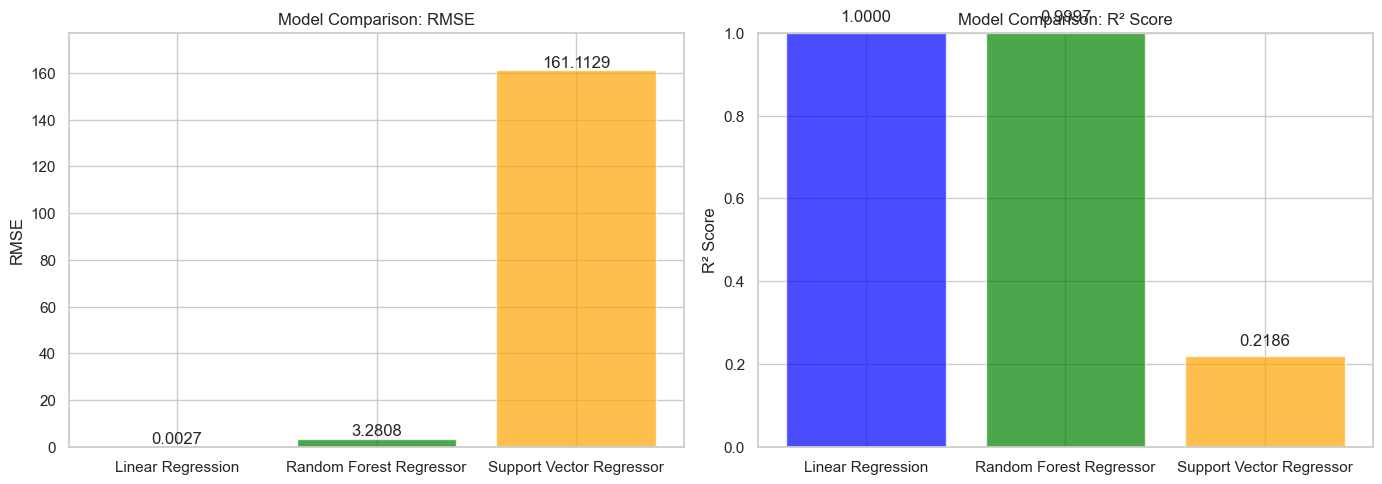

In [45]:
# Create a comparison chart for all models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Comparison
rmse_values = evaluation_df['RMSE'].values
models_list = evaluation_df['Model'].values

axes[0].bar(models_list, rmse_values, color=['blue', 'green', 'orange'], alpha=0.7)
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Comparison: RMSE')
axes[0].set_ylim([0, max(rmse_values) * 1.1])
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + 0.1, f'{v:.4f}', ha='center', va='bottom')

# R² Score Comparison
r2_values = evaluation_df['R2 Score'].values

axes[1].bar(models_list, r2_values, color=['blue', 'green', 'orange'], alpha=0.7)
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Comparison: R² Score')
axes[1].set_ylim([0, 1])
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

                      Model        RMSE  R2 Score
0         Linear Regression    0.002746  1.000000
1   Random Forest Regressor    3.280801  0.999676
2  Support Vector Regressor  161.112897  0.218583


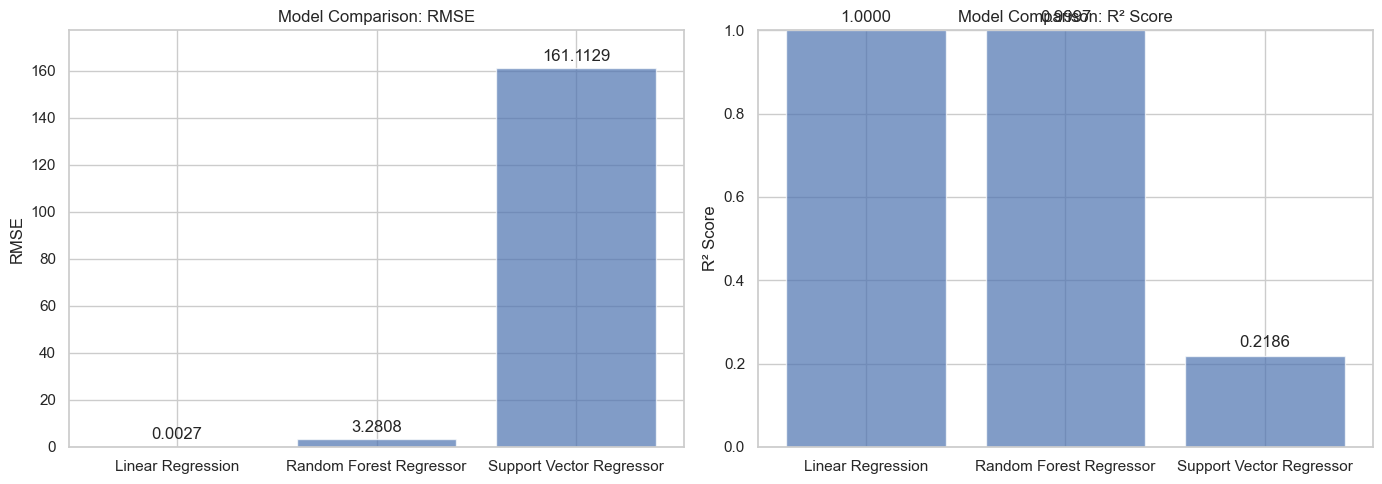

In [46]:
# visualization comparing the performance metrics (RMSE, R² Score) across the three models 
# (Linear Regression, Random Forest, SVR). The evaluation metrics are printed as text 
# but not visualized with a bar chart or comparison plot.

import matplotlib.pyplot as plt
import numpy as np

# Ensure evaluation_df exists
print(evaluation_df)

# Create a comparison chart for all models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- RMSE Comparison ---
rmse_values = evaluation_df['RMSE'].values
models_list = evaluation_df['Model'].values

axes[0].bar(models_list, rmse_values, alpha=0.7)
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Comparison: RMSE')
axes[0].set_ylim([0, max(rmse_values) * 1.1])

# Annotate values
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + (max(rmse_values) * 0.02), f'{v:.4f}', ha='center')

# --- R² Score Comparison ---
r2_values = evaluation_df['R2 Score'].values

axes[1].bar(models_list, r2_values, alpha=0.7)
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Comparison: R² Score')
axes[1].set_ylim([0, 1])

# Annotate values
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()


### Best Model Selection

In [35]:
# Select best model based on lowest RMSE
best_model = evaluation_df.loc[evaluation_df["RMSE"].idxmin()]

print("Best Model Selected:")
print(best_model)


Best Model Selected:
Model       Linear Regression
RMSE                 0.002746
R2 Score                  1.0
Name: 0, dtype: object


#### Save the Best Model

In [36]:
import joblib

# Save Linear Regression model
joblib.dump(linear_model, "best_stock_price_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [37]:
# Load trained model
model = joblib.load("best_stock_price_model.pkl")
print(model)

LinearRegression()


## Actual vs Predicted Closing Price (KEY MODEL PLOT)

Best for: Explaining model performance

Visualization

Scatter plot:

X-axis: `Actual close`

Y-axis: `Predicted close`

Add a diagonal reference line

Why it’s important:

Directly shows how accurate the model is

Easy for non-technical audiences to understand

Clearly demonstrates regression effectiveness

How to explain it:

This plot compares actual closing prices with model predictions. Points closer to the diagonal line indicate higher prediction accuracy, demonstrating the model’s effectiveness.

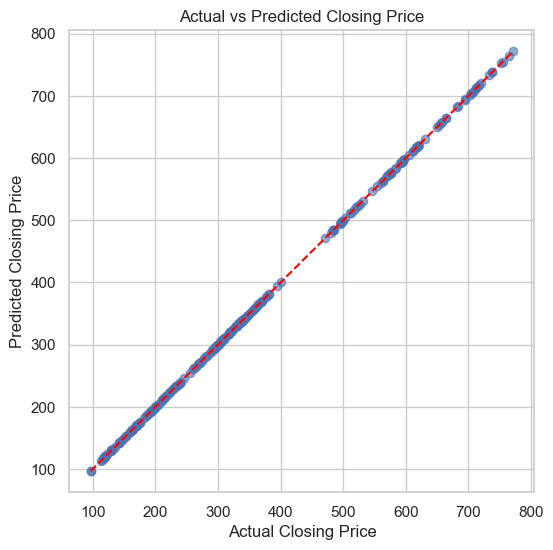

In [38]:
# Load the trained model
model = joblib.load("best_stock_price_model.pkl")

# Make predictions
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs Predicted Closing Price")
plt.show()


## Residuals Plot (Model Diagnostics)

Best for: Model diagnostics (academic strength)

Visualization:

Residuals (Actual − Predicted) vs Predicted Close

Why it’s important:

Shows whether errors are random

Detects bias or heteroscedasticity

Validates regression assumptions

How to explain it:

The residual plot confirms that prediction errors are randomly distributed, indicating that the model captures the underlying data patterns effectively.

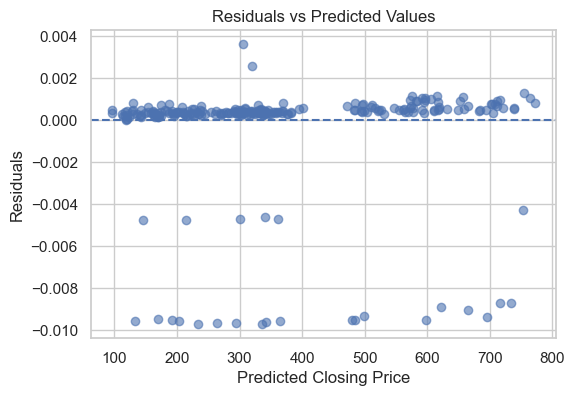

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Closing Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


# Results and Analysis

### Exploratory Data Analysis (EDA)

###### Time Series of Closing Price
The time series plot of the stock’s closing price provides an overview of historical price movements, trends, and volatility patterns. Observing these trends helps understand the general behavior of the stock and informs feature engineering for model training.

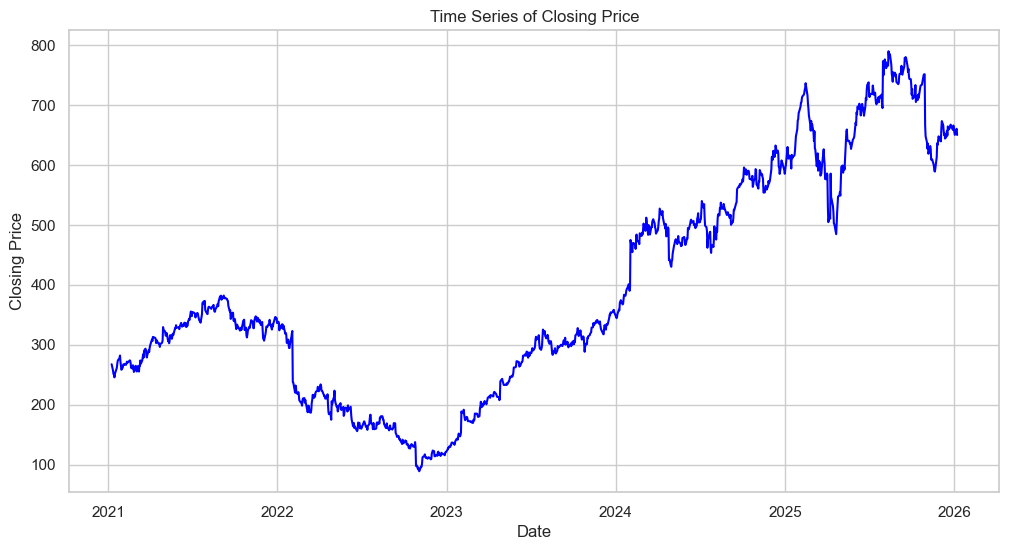

In [40]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Time Series of Closing Price")
plt.show()


##### Distribution of Closing Price
The distribution of the closing price shows the range, skewness, and frequency of prices. It helps identify extreme values or outliers that could affect model performance.

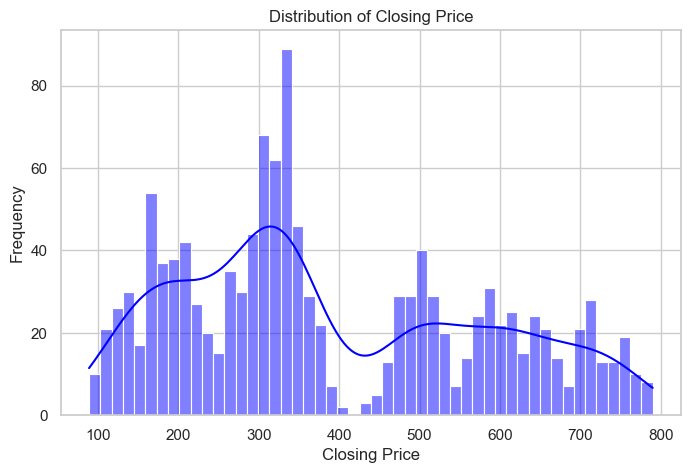

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['close'], bins=50, kde=True, color='blue')
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Price")
plt.show()


##### Correlation Heatmap
The correlation heatmap helps visualize relationships between features and the target variable, aiding in feature selection.

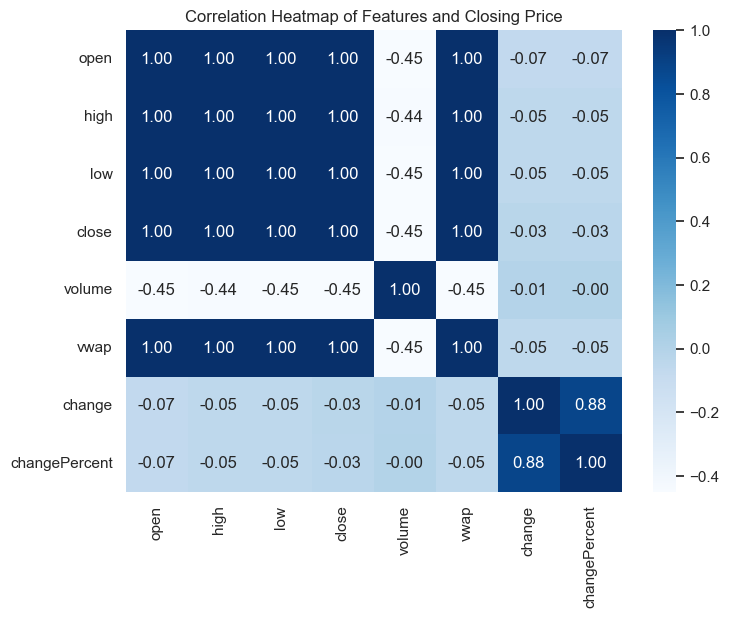

In [42]:

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",   # Blue–White color scale
    fmt=".2f"
)

plt.title("Correlation Heatmap of Features and Closing Price")
plt.show()


### Model Results

##### Actual vs Predicted Closing Price

The scatter plot below compares the actual closing prices with the predicted prices from the model. A regression line and a perfect fit line are added to assess prediction accuracy visually.

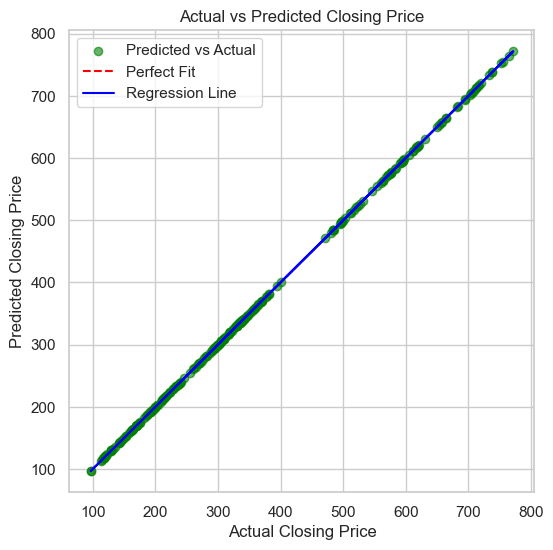

In [43]:
# Predictions
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--', color='red', label='Perfect Fit')
# Regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='blue', label='Regression Line')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.show()


##### Model Evaluation Metrics

In [44]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.00
